In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
italy=gpd.read_file("italian-maps-shapefiles-master/italy-with-regions/reg2011_g.shp")

In [6]:
covid=pd.read_csv("Covid.csv")
new_regions=pd.read_csv("italian-maps-shapefiles-master/italy-with-regions/reg2011_g.csv")

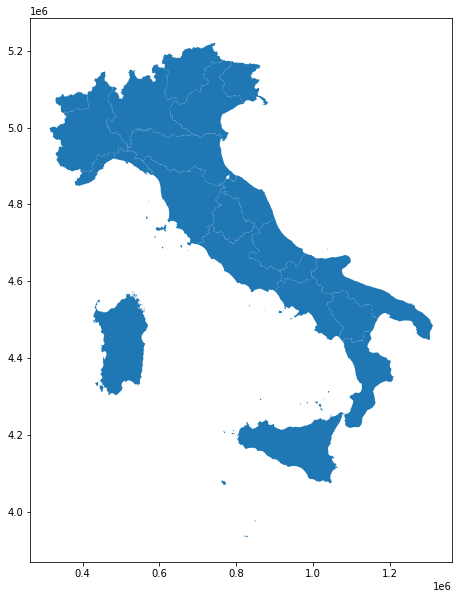

In [9]:
italy.plot(figsize=(10,10))
plt.show()

In [11]:
italy['NOME_REG'] = new_regions['NOME_REG']
merge = italy.merge(covid, on='NOME_REG', how='right')
merge.head()

,COD_REG,NOME_REG,SHAPE_Leng,SHAPE_Area,geometry,Confirmed,Death
0,3.0,Lombardia,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126...",72889.0,13325.0
1,1.0,Piemonte,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5...",24832.0,2823.0
2,8.0,Emilia-Romagna,1.164723e+06,2.245147e+10,"MULTIPOLYGON (((760714.748 4937319.399, 760723...",24450.0,3386.0
3,5.0,Veneto,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5...",17471.0,1315.0
4,9.0,Toscana,1.316658e+06,2.298443e+10,"MULTIPOLYGON (((593650.250 4867988.000, 593553...",9147.0,778.0


In [13]:
merge['Ratio'] = merge['Death'] / merge['Confirmed']
merge.head()

,COD_REG,NOME_REG,SHAPE_Leng,SHAPE_Area,geometry,Confirmed,Death,Ratio
0,3.0,Lombardia,1.411265e+06,2.386270e+10,"MULTIPOLYGON (((595736.187 5163715.001, 596126...",72889.0,13325.0,0.182812
1,1.0,Piemonte,1.236869e+06,2.539410e+10,"POLYGON ((457832.312 5145701.000, 458745.249 5...",24832.0,2823.0,0.113684
2,8.0,Emilia-Romagna,1.164723e+06,2.245147e+10,"MULTIPOLYGON (((760714.748 4937319.399, 760723...",24450.0,3386.0,0.138487
3,5.0,Veneto,1.057856e+06,1.840550e+10,"POLYGON ((768209.001 5175597.001, 768220.251 5...",17471.0,1315.0,0.075268
4,9.0,Toscana,1.316658e+06,2.298443e+10,"MULTIPOLYGON (((593650.250 4867988.000, 593553...",9147.0,778.0,0.085055


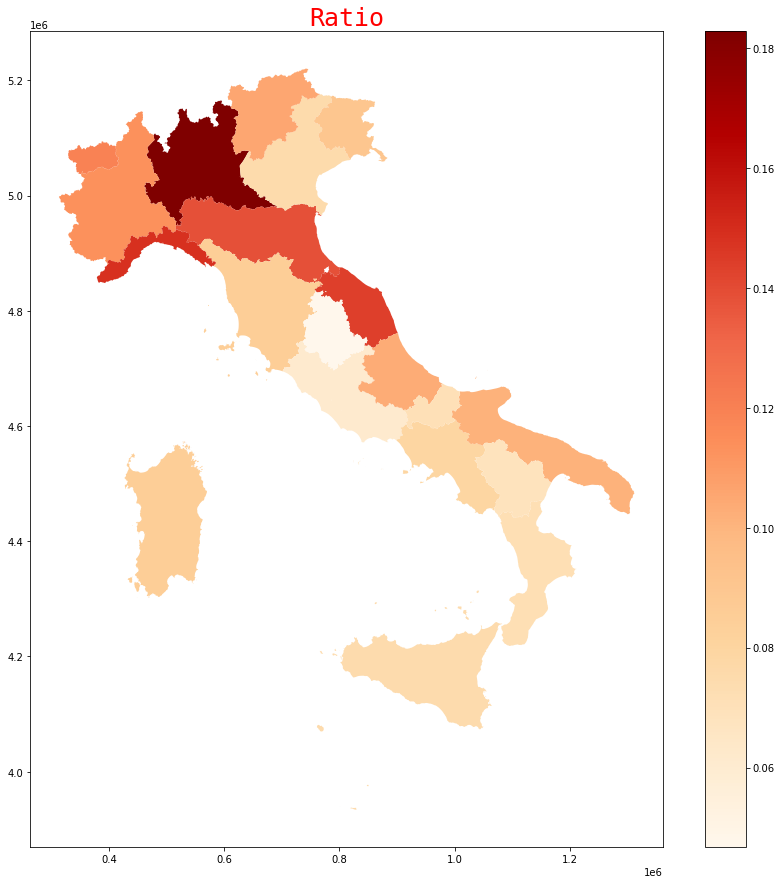

In [15]:
fig, ax = plt.subplots(1, figsize=(15, 15))
col = 'Ratio'
ax.set_title(
col, 
fontdict={'fontsize':'25', 'fontweight':'3'}, 
color='Red', 
fontfamily='monospace')
merge.plot(
ax=ax,
column=col,
cmap='OrRd',
label='ciao',
legend=True,
categorical=False
)

plt.show()